In [1]:
%load_ext autoreload
%autoreload 2

In [16]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.options.display.max_info_columns=500
pd.options.display.max_info_rows=550
from tensorflow.keras.losses import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
# from sklearn.compose import ColumnTransformer
from sklearn import set_config; set_config(display='diagram')
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV, cross_val_score, GridSearchCV
from xgboost import XGBRegressor

In [4]:
pd.read_csv("../raw_data/all_features_with_sectorrev.csv")

,Unnamed: 0,company_name,TCUID,MI_ID,intensity_scope1_CY2021,intensity_scope1_CY2020,intensity_scope1_CY2019,intensity_scope1_CY2018,intensity_scope1_CY2017,intensity_scope1_CY2016,intensity_scope1_CY2015,intensity_scope1_CY2014,intensity_scope1_CY2013,intensity_scope1_CY2012,intensity_scope1_CY2011,intensity_scope1_CY2010,disclosureCY0,disclosureCY2021,disclosureCY2020,disclosureCY2019,disclosureCY2018,disclosureCY2017,disclosureCY2016,disclosureCY2015,disclosureCY2014,disclosureCY2013,disclosureCY2012,disclosureCY2011,disclosureCY2010,Sector,Industry Group,Industry,Primary Industry,Country / Region Name,S&P Credit Rating,Full Time Employees\n(actual),Total Enterprise Value (CIQ)\n($M),revenueCY0,revenueCY2021,revenueCY2020,revenueCY2019,revenueCY2018,revenueCY2017,revenueCY2016,revenueCY2015,revenueCY2014,revenueCY2013,revenueCY2012,revenueCY2011,revenueCY2010,climate_strategy_scoreFY2022,climate_strategy_scoreFY2021,climate_strategy_scoreFY2020,climate_strategy_scoreFY2019,climate_strategy_scoreFY2018,climate_strategy_scoreFY2017,climate_strategy_scoreFY2016,climate_strategy_scoreFY2015,climate_strategy_scoreFY2014,climate_strategy_scoreFY2013,nuclear_percentage_revenue,thermal_coal_percentage_revenue,ultra_deep_sea_drilling_percentage_revenue,shale_oil_gas_percentage_revenue,coal_percentage_revenue,arctic_drilling_percentage_revenue,oil_sands_percentage_revenue,intensity_scope2CY0,intensity_scope2CY2021,intensity_scope2CY2020,intensity_scope2CY2019,intensity_scope2CY2018,intensity_scope2CY2017,intensity_scope2CY2016,intensity_scope2CY2015,intensity_scope2CY2014,intensity_scope2CY2013,intensity_scope2CY2012,intensity_scope2CY2011,intensity_scope2CY2010,pe_ratio12/31/2021,pe_ratio12/31/2020,pe_ratio12/31/2019,pe_ratio12/31/2018,pe_ratio12/29/2017,pe_ratio12/30/2016,pe_ratio12/31/2015,pe_ratio12/31/2014,pe_ratio12/31/2013,pe_ratio12/31/2012,pe_ratio12/30/2011,pe_ratio12/31/2010,intensity_scope3CY0,intensity_scope3CY2021,intensity_scope3CY2020,intensity_scope3CY2019,intensity_scope3CY2018,intensity_scope3CY2017,intensity_scope3CY2016,intensity_scope3CY2015,intensity_scope3CY2014,intensity_scope3CY2013,intensity_scope3CY2012,intensity_scope3CY2011,intensity_scope3CY2010,Abrasive product manufacturing,"Accounting, tax preparation, bookkeeping, and payroll services",Adhesive manufacturing,Advertising and related services,Air and gas compressor manufacturing,"Air conditioning, refrigeration, and warm air heating equipment manufacturing",Air purification and ventilation equipment manufacturing,Air transportation,Aircraft engine and engine parts manufacturing,Aircraft manufacturing,Alkalies and chlorine manufacturing,All other basic inorganic chemical manufacturing,All other chemical product and preparation manufacturing,All other converted paper product manufacturing,All other crop farming,All other food manufacturing,"All other forging, stamping, and sintering",All other miscellaneous electrical equipment and component manufacturing,All other miscellaneous manufacturing,"All other miscellaneous professional, scientific, and technical services",All other miscellaneous wood product manufacturing,All other paper bag and coated and treated paper manufacturing,All other petroleum and coal products manufacturing,All other textile product mills,All other transportation equipment manufacturing,Alumina refining and primary aluminum production,Aluminum product manufacturing from purchased aluminum,Ammunition manufacturing,"Amusement parks, arcades, and gambling industries",Analytical laboratory instrument manufacturing,"Animal (except poultry) slaughtering, rendering, and processing","Animal production, except cattle and poultry and eggs",Apparel accessories and other apparel manufacturing,Apparel knitting mills,"Apparel, Piece Goods, and Notions Wholesalers","Architectural, engineering, and related services","Arms, ordnance, and accessories manufacturing",Artificial and synthetic fibers and filaments manufacturing,Asphalt paving mixture an

In [5]:
from carbon_forecast.utils.preproc import load_n_preproc_all_avail
df = load_n_preproc_all_avail()
X = df.drop(columns=["company_name", "TCUID", "year", "intensity_1and2","intensity_scope3"])
y = df["intensity_1and2"]

Reading data...
Preproc on power % revenue
Preproc on Sector Revenue
Selecting the year 2013 required...
Dropping rows that are showing NaN on...
-> intensity_scope1CY2013
-> intensity_scope2CY2013
-> intensity_scope3CY2013
-> Revenue2013
Filling employee numbers with mean value... (subject to change later)
Filling EV with mean value... (subject to change later)
Calculating Employees & EV per Revenue...
Filling null Climate Strategy Score with 0...
Cleaning P/E Ratio...
Adding Scope 1 and Scope 2 data together...
Doing some column renaming...
Filling in Disclosure...
Dataset preproc-ed for the year 2013!👍
Reading data...
Preproc on power % revenue
Preproc on Sector Revenue
Selecting the year 2014 required...
Dropping rows that are showing NaN on...
-> intensity_scope1CY2014
-> intensity_scope2CY2014
-> intensity_scope3CY2014
-> Revenue2014
Filling employee numbers with mean value... (subject to change later)
Filling EV with mean value... (subject to change later)
Calculating Employees 

In [ ]:
# import math
# i = 0 
# for x in X["disclosure"]:
#     if math.isnan(x):
#         print(i)
#     i+=1

In [ ]:
# X.iloc[45750,:]

In [6]:
from carbon_forecast.utils.tx import tt_split, our_tx
tx = our_tx(X)
X_train_transformed, X_test_transformed, y_train, y_test = tt_split(X,y,tx)

In [ ]:
# i=0
# for x in np.isnan(X_train_transformed):
#     if x.sum() == 1:
#         print(i)
#     i+=1

In [ ]:
# X_train_transformed[44461][-19]

In [ ]:
# tx.get_feature_names_out()[-19]

In [ ]:
# i = 0
# for x in X_train_transformed[44461]:
#     if x == "nan":
#         print(i)
#     i+=1

In [7]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train_transformed)

PCA()

In [8]:
X_proj = pca.transform(X_train_transformed)
X_proj

array([[ 5.90597312e-01, -5.08552911e-01,  9.89725990e-01, ...,
         1.77778278e-12,  9.10883565e-17, -1.78713249e-16],
       [ 4.16288030e-01, -2.56176005e-01, -1.81792620e-01, ...,
        -3.27029723e-12,  6.37110572e-17, -8.74385638e-17],
       [-3.82123709e-01, -5.57040131e-02, -3.41239341e-02, ...,
         2.92833119e-12,  2.86382898e-17, -1.21798474e-17],
       ...,
       [ 7.43391282e-01,  7.62657117e-01,  4.44439359e-02, ...,
        -6.16923179e-12,  1.80264791e-17, -2.57718472e-17],
       [-3.96119675e-01, -7.17362855e-02, -4.49078809e-02, ...,
        -1.62541161e-12,  2.86341705e-17, -1.23203864e-16],
       [-3.41484490e-01, -3.80065550e-01,  1.06404108e+00, ...,
        -2.41649409e-12,  6.33281999e-17, -1.23203347e-16]])

(0.0, 50.0)

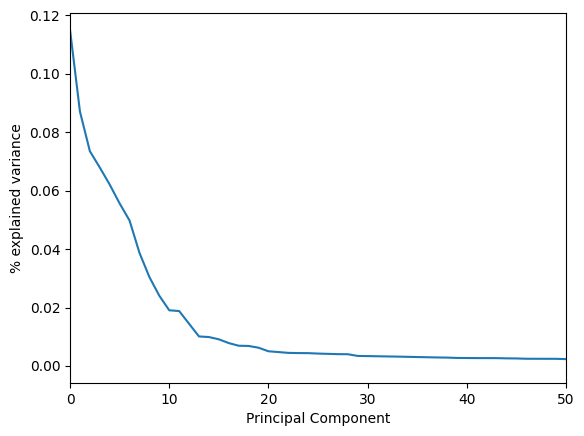

In [24]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Principal Component'); plt.ylabel('% explained variance');
plt.xlim(0,50)

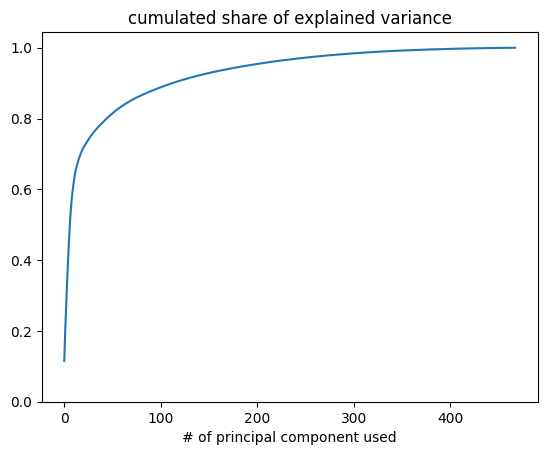

In [13]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.ylim(ymin=0)
plt.title('cumulated share of explained variance')
plt.xlabel('# of principal component used');

In [19]:
pca12 = PCA(n_components=12).fit(X_train_transformed)
X_proj12 = pca12.fit_transform(X_train_transformed)
X_proj12

array([[ 5.90597312e-01, -5.08552911e-01,  9.89725990e-01, ...,
        -2.35132842e-02,  5.83739241e-02, -2.85711691e-01],
       [ 4.16288030e-01, -2.56176004e-01, -1.81792619e-01, ...,
        -7.16128243e-03,  8.00757750e-02, -2.64506821e-01],
       [-3.82123709e-01, -5.57040130e-02, -3.41239347e-02, ...,
        -2.34973828e-02,  8.06780029e-04, -8.75137539e-03],
       ...,
       [ 7.43391282e-01,  7.62657117e-01,  4.44439356e-02, ...,
        -1.70398910e-03,  9.20254498e-02, -2.69407620e-01],
       [-3.96119675e-01, -7.17362854e-02, -4.49078802e-02, ...,
        -7.59175219e-02, -3.12275910e-02, -4.17121510e-02],
       [-3.41484490e-01, -3.80065550e-01,  1.06404108e+00, ...,
        -3.22223328e-02, -3.72312785e-02, -5.90202916e-04]])

In [17]:
model_pca = XGBRegressor(n_estimators=1000, max_depth=15, objective="reg:squarederror", eval_metric="mape")
cross_val_score(model_pca, X_proj12, y_train, cv=5, scoring="neg_mean_absolute_percentage_error")

array([-4.4045515 , -2.06368918, -2.39451092, -8.64870242, -1.66332832])

In [20]:
model_pca.fit(X_proj12, y_train)
X_test_proj12 = pca12.transform(X_test_transformed)
y_pred = model_pca.predict(X_test_proj12)
y_pred

array([ 37.642323, 176.66743 ,  20.23813 , ...,  87.830124, 215.58664 ,
       757.1104  ], dtype=float32)

In [22]:
mean_absolute_percentage_error(y_test, y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=238.88202>